In [69]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler




data=pd.read_csv("/Users/Tara/Downloads/Global_Mobility_Report (1).csv")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



In [70]:
data.head

<bound method NDFrame.head of         country_region_code        country_region       sub_region_1  \
0                        AE  United Arab Emirates                NaN   
1                        AE  United Arab Emirates                NaN   
2                        AE  United Arab Emirates                NaN   
3                        AE  United Arab Emirates                NaN   
4                        AE  United Arab Emirates                NaN   
...                     ...                   ...                ...   
2356279                  ZW              Zimbabwe  Midlands Province   
2356280                  ZW              Zimbabwe  Midlands Province   
2356281                  ZW              Zimbabwe  Midlands Province   
2356282                  ZW              Zimbabwe  Midlands Province   
2356283                  ZW              Zimbabwe  Midlands Province   

        sub_region_2 metro_area iso_3166_2_code  census_fips_code        date  \
0                NaN    

In [71]:
data=data[data.country_region=="United States"]

In [72]:
data.head

<bound method NDFrame.head of         country_region_code country_region sub_region_1   sub_region_2  \
1794395                  US  United States          NaN            NaN   
1794396                  US  United States          NaN            NaN   
1794397                  US  United States          NaN            NaN   
1794398                  US  United States          NaN            NaN   
1794399                  US  United States          NaN            NaN   
...                     ...            ...          ...            ...   
2332432                  US  United States      Wyoming  Weston County   
2332433                  US  United States      Wyoming  Weston County   
2332434                  US  United States      Wyoming  Weston County   
2332435                  US  United States      Wyoming  Weston County   
2332436                  US  United States      Wyoming  Weston County   

        metro_area iso_3166_2_code  census_fips_code        date  \
1794395      

In [73]:
data=data[data.date.astype(str).str.contains("2020-06")]
data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794502,US,United States,NaN,NaN,NaN,NaN,NaN,2020-06-01,-18.0,-2.0,28.0,-36.0,-37.0,12.0
1794503,US,United States,NaN,NaN,NaN,NaN,NaN,2020-06-02,-18.0,0.0,35.0,-36.0,-37.0,13.0
1794504,US,United States,NaN,NaN,NaN,NaN,NaN,2020-06-03,-16.0,1.0,33.0,-35.0,-37.0,13.0
1794505,US,United States,NaN,NaN,NaN,NaN,NaN,2020-06-04,-18.0,1.0,40.0,-35.0,-37.0,13.0
1794506,US,United States,NaN,NaN,NaN,NaN,NaN,2020-06-05,-20.0,-2.0,34.0,-34.0,-36.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332384,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-06-24,NaN,NaN,NaN,NaN,-28.0,NaN
2332385,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-06-25,NaN,NaN,NaN,NaN,-20.0,NaN
2332386,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-06-26,NaN,NaN,NaN,NaN,-22.0,NaN
2332387,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-06-29,NaN,NaN,NaN,NaN,-25.0,NaN


In [74]:
data=data[["country_region", "sub_region_1", "date", 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]

In [75]:
data.head

<bound method NDFrame.head of         country_region sub_region_1        date  \
1794502  United States          NaN  2020-06-01   
1794503  United States          NaN  2020-06-02   
1794504  United States          NaN  2020-06-03   
1794505  United States          NaN  2020-06-04   
1794506  United States          NaN  2020-06-05   
...                ...          ...         ...   
2332384  United States      Wyoming  2020-06-24   
2332385  United States      Wyoming  2020-06-25   
2332386  United States      Wyoming  2020-06-26   
2332387  United States      Wyoming  2020-06-29   
2332388  United States      Wyoming  2020-06-30   

         retail_and_recreation_percent_change_from_baseline  \
1794502                                              -18.0    
1794503                                              -18.0    
1794504                                              -16.0    
1794505                                              -18.0    
1794506                                   

In [76]:
data.dropna(axis=0, how="any", inplace=True)

<ipython-input-76-a41fd17ba840>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
data.head


<bound method NDFrame.head of         country_region sub_region_1        date  \
1794705  United States      Alabama  2020-06-01   
1794706  United States      Alabama  2020-06-02   
1794707  United States      Alabama  2020-06-03   
1794708  United States      Alabama  2020-06-04   
1794709  United States      Alabama  2020-06-05   
...                ...          ...         ...   
2330736  United States      Wyoming  2020-06-26   
2330737  United States      Wyoming  2020-06-27   
2330738  United States      Wyoming  2020-06-28   
2330739  United States      Wyoming  2020-06-29   
2330740  United States      Wyoming  2020-06-30   

         retail_and_recreation_percent_change_from_baseline  \
1794705                                               -1.0    
1794706                                               -4.0    
1794707                                                1.0    
1794708                                               -6.0    
1794709                                   

In [78]:
scaler=StandardScaler()
data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]) 

data




<ipython-input-78-a17db85ee869>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794705,United States,Alabama,2020-06-01,0.566915,0.377226,0.313974,0.006464,-0.046697
1794706,United States,Alabama,2020-06-02,0.358397,0.285928,0.233672,0.093529,0.164029
1794707,United States,Alabama,2020-06-03,0.705927,0.468524,0.313974,0.006464,-0.046697
1794708,United States,Alabama,2020-06-04,0.219385,0.377226,0.193520,0.093529,0.164029
1794709,United States,Alabama,2020-06-05,-0.058640,-0.170560,0.153369,0.006464,0.374755
...,...,...,...,...,...,...,...,...
2330736,United States,Wyoming,2020-06-26,0.497409,1.564097,0.675338,0.180593,-0.889602
2330737,United States,Wyoming,2020-06-27,0.288891,1.290204,0.635186,1.573627,-2.364685
2330738,United States,Wyoming,2020-06-28,0.844940,0.651120,0.273823,1.747756,-2.153959
2330739,United States,Wyoming,2020-06-29,1.470494,1.472799,0.795792,0.441787,-1.100328


In [79]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
principal_components = pca.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
pca_data = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', "PC 3", "PC 4"])
print(pca.explained_variance_ratio_)
print("0.98260139 of the variance in the data is represented by these 4 principle components")
pca_data



[0.62514629 0.21285298 0.0884521  0.05880458]
0.98260139 of the variance in the data is represented by these 4 principle components


,PC 1,PC 2,PC 3,PC 4
0,-0.579347,-0.456826,-0.001628,-0.126707
1,-0.346065,-0.347553,0.011748,-0.019703
2,-0.679869,-0.557805,-0.060786,-0.184415
3,-0.305198,-0.315638,-0.069763,0.120475
4,0.209230,-0.096465,0.264593,0.050267
...,...,...,...,...
23041,-1.702067,-0.528073,-0.526839,0.592081
23042,-2.785450,1.198830,-0.662810,0.450687
23043,-2.567795,1.313459,-0.577759,-0.413684
23044,-2.362630,-0.696386,-0.454437,-0.175155


In [80]:
# factor loadings are correlations of features and components- trying to find the latent factors

loadings = pd.DataFrame( pca.components_, columns=["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]).T
loadings


,0,1,2,3
retail_and_recreation_percent_change_from_baseline,-0.443322,-0.446900,-0.033719,-0.762858
grocery_and_pharmacy_percent_change_from_baseline,-0.426023,-0.425582,-0.596626,0.529468
transit_stations_percent_change_from_baseline,-0.451679,-0.215318,0.790193,0.353863
workplaces_percent_change_from_baseline,-0.424931,0.613284,-0.083585,0.015776
residential_percent_change_from_baseline,0.487227,-0.443488,0.107282,0.110648


In [82]:
print("'loadings' are also eigenvectors")
print("Greatest contributors to PC1: residential")
print("Greatest contributors to PC2: workplace")

print("Greatest contributor to PC3: transit")
print("Greatest contributors to PC4: grocery and transit")

# https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
# could also do color matrix https://towardsdatascience.com/understand-your-data-with-principle-component-analysis-pca-and-discover-underlying-patterns-d6cadb020939

'loadings' are also eigenvectors
Greatest contributors to PC1: residential
Greatest contributors to PC2: workplace
Greatest contributor to PC3: transit
Greatest contributors to PC4: grocery and transit


In [83]:
# # find OPTIMAL value for kmeans
# from sklearn.cluster import KMeans
# data_kmeans = pd.DataFrame(pca_data)
# Sum_of_squared_distances = []
# K = range(1,7)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(pca_data)
#     Sum_of_squared_distances.append(km.inertia_)
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()






In [84]:
print(type(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]))

<class 'pandas.core.frame.DataFrame'>


In [85]:
# run KMeans
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(pca_data[['PC 1', 'PC 2', "PC 3", "PC 4"]])
pca_data['Cluster'] = y
# pca_data["State"]=data["sub_region_1"]
pca_data

,PC 1,PC 2,PC 3,PC 4,Cluster
0,-0.579347,-0.456826,-0.001628,-0.126707,0
1,-0.346065,-0.347553,0.011748,-0.019703,0
2,-0.679869,-0.557805,-0.060786,-0.184415,0
3,-0.305198,-0.315638,-0.069763,0.120475,0
4,0.209230,-0.096465,0.264593,0.050267,0
...,...,...,...,...,...
23041,-1.702067,-0.528073,-0.526839,0.592081,3
23042,-2.785450,1.198830,-0.662810,0.450687,3
23043,-2.567795,1.313459,-0.577759,-0.413684,3
23044,-2.362630,-0.696386,-0.454437,-0.175155,3


In [86]:
ls_to_append=[]
for index, row in data.iterrows():
    ls_to_append.append(row["sub_region_1"])

# ls_to_append


In [87]:
series_to_add_to_pca_data=pd.Series(ls_to_append)
pca_data["State"]=series_to_add_to_pca_data
pca_data


,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,-0.579347,-0.456826,-0.001628,-0.126707,0,Alabama
1,-0.346065,-0.347553,0.011748,-0.019703,0,Alabama
2,-0.679869,-0.557805,-0.060786,-0.184415,0,Alabama
3,-0.305198,-0.315638,-0.069763,0.120475,0,Alabama
4,0.209230,-0.096465,0.264593,0.050267,0,Alabama
...,...,...,...,...,...,...
23041,-1.702067,-0.528073,-0.526839,0.592081,3,Wyoming
23042,-2.785450,1.198830,-0.662810,0.450687,3,Wyoming
23043,-2.567795,1.313459,-0.577759,-0.413684,3,Wyoming
23044,-2.362630,-0.696386,-0.454437,-0.175155,3,Wyoming


In [88]:
pca_data.Cluster.unique()

array([0, 1, 3, 2], dtype=int32)

In [89]:
c0={}
c1={}
c2={}
c3={}
c4={}
list_of_clusters=[c0,c1,c2,c3,c4]
for index, row in pca_data.iterrows():
    for i in range(0,5):
        if row["Cluster"]==i:
            if row["State"] in list_of_clusters[i]:
                list_of_clusters[i][row["State"]]+=1
            else:
                list_of_clusters[i][row["State"]]=1
                
                
print(list_of_clusters)

[{'Alabama': 213, 'Alaska': 28, 'Arizona': 71, 'Arkansas': 130, 'California': 350, 'Colorado': 153, 'Connecticut': 92, 'Delaware': 38, 'Florida': 273, 'Georgia': 382, 'Idaho': 29, 'Illinois': 346, 'Indiana': 288, 'Iowa': 119, 'Kansas': 125, 'Kentucky': 267, 'Louisiana': 266, 'Maine': 80, 'Maryland': 91, 'Massachusetts': 104, 'Michigan': 230, 'Minnesota': 169, 'Mississippi': 164, 'Missouri': 183, 'Montana': 22, 'Nebraska': 87, 'Nevada': 31, 'New Hampshire': 102, 'New Jersey': 109, 'New Mexico': 148, 'New York': 301, 'North Carolina': 452, 'North Dakota': 44, 'Ohio': 363, 'Oklahoma': 110, 'Oregon': 134, 'Pennsylvania': 365, 'Rhode Island': 54, 'South Carolina': 303, 'South Dakota': 13, 'Tennessee': 278, 'Texas': 812, 'Utah': 94, 'Vermont': 56, 'Virginia': 342, 'Washington': 268, 'West Virginia': 86, 'Wisconsin': 238, 'Wyoming': 4}, {'Alabama': 53, 'Alaska': 11, 'Arizona': 46, 'Arkansas': 31, 'California': 273, 'Colorado': 74, 'Connecticut': 46, 'Delaware': 17, 'District of Columbia': 3, 

In [90]:
states_clusters={}
for index, row in pca_data.iterrows():
    if row["State"] not in states_clusters:
        state_dict={}
        for i in range(0,5):
            if row["State"] in list_of_clusters[i]:
                state_dict[i]=list_of_clusters[i][row["State"]]
        print(state_dict)
        state_dict_vals=list(state_dict.values())
        state_dict_keys=list(state_dict.keys())
        state_vals_max=max(state_dict_vals)
        max_ind=state_dict_vals.index(state_vals_max)
        max_cluster=state_dict_keys[max_ind]
        states_clusters[row["State"]]=max_cluster
print(states_clusters)
    

{0: 213, 1: 53, 2: 12, 3: 202}
{0: 28, 1: 11, 3: 50}
{0: 71, 1: 46, 2: 116, 3: 110}
{0: 130, 1: 31, 2: 11, 3: 182}
{0: 350, 1: 273, 2: 501, 3: 84}
{0: 153, 1: 74, 2: 93, 3: 86}
{0: 92, 1: 46, 2: 62, 3: 6}
{0: 38, 1: 17, 2: 24, 3: 33}
{1: 3, 2: 27}
{0: 273, 1: 329, 2: 366, 3: 124}
{0: 382, 1: 121, 2: 123, 3: 170}
{1: 5, 2: 137}
{0: 29, 1: 12, 3: 132}
{0: 346, 1: 117, 2: 115, 3: 144}
{0: 288, 1: 39, 2: 26, 3: 453}
{0: 119, 1: 17, 2: 10, 3: 142}
{0: 125, 1: 35, 2: 8, 3: 121}
{0: 267, 1: 44, 3: 103}
{0: 266, 1: 69, 2: 71, 3: 168}
{0: 80, 1: 20, 2: 11, 3: 35}
{0: 91, 1: 82, 2: 193, 3: 11}
{0: 104, 1: 74, 2: 175, 3: 26}
{0: 230, 1: 73, 2: 110, 3: 155}
{0: 169, 1: 49, 2: 60, 3: 35}
{0: 164, 1: 24, 2: 5, 3: 119}
{0: 183, 1: 52, 2: 45, 3: 243}
{0: 22, 1: 16, 3: 142}
{0: 87, 1: 25, 2: 6, 3: 82}
{0: 31, 1: 22, 2: 37, 3: 42}
{0: 102, 1: 24, 2: 3, 3: 9}
{0: 109, 1: 125, 2: 323, 3: 9}
{0: 148, 1: 70, 2: 38, 3: 38}
{0: 301, 1: 185, 2: 386, 3: 64}
{0: 452, 1: 126, 2: 100, 3: 170}
{0: 44, 1: 28, 3: 72}

In [91]:
clusters_and_their_states={1:[], 2:[], 3:[], 4:[], 0:[]}

for i in states_clusters.keys():
    for j in range(0,5):
        if states_clusters[i]==j:
            clusters_and_their_states[j].append(i)


print(clusters_and_their_states)


{1: [], 2: ['Arizona', 'California', 'District of Columbia', 'Florida', 'Hawaii', 'Maryland', 'Massachusetts', 'New Jersey', 'New York'], 3: ['Alaska', 'Arkansas', 'Idaho', 'Indiana', 'Iowa', 'Missouri', 'Montana', 'Nevada', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'South Dakota', 'Tennessee', 'Utah', 'Wyoming'], 4: [], 0: ['Alabama', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Illinois', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Minnesota', 'Mississippi', 'Nebraska', 'New Hampshire', 'New Mexico', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Texas', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin']}


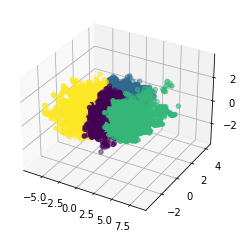

In [92]:
# 4d plot for april kmeans
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_data["PC 1"]
y = pca_data["PC 2"]
z = pca_data["PC 3"]
z = pca_data["PC 4"]

categories = np.unique(pca_data["Cluster"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
pca_data["Color"] = pca_data["Cluster"].apply(lambda x: colordict[x])

img=ax.scatter(x,y,z, c=pca_data.Color)


# fig.colorbar(img)
plt.show()


In [93]:
num=0
pca_2=pd.DataFrame(columns=['PC 1', 'PC 2', "PC 3", "PC 4", "Cluster", "State"])
for index, row in pca_data.iterrows():
    if num%15==0:
        pca_2=pca_2.append({"PC 1": row["PC 1"],"PC 2": row["PC 2"],"PC 3": row["PC 3"],"PC 4": row["PC 4"],"Cluster": row["Cluster"],"State": row["State"] }, ignore_index=True)
    num+=1
pca_2.head


<bound method NDFrame.head of           PC 1      PC 2      PC 3      PC 4 Cluster    State
0    -0.579347 -0.456826 -0.001628 -0.126707       0  Alabama
1    -0.532059 -0.218846  0.129173 -0.100384       0  Alabama
2    -2.399165 -0.986574 -0.847107 -0.202800       3  Alabama
3    -2.646432 -0.958444 -0.492261 -0.159334       3  Alabama
4    -0.721767 -0.898684 -0.767286 -1.137874       0  Alabama
...        ...       ...       ...       ...     ...      ...
1532 -1.487469  0.255996  0.334708 -0.241212       3  Wyoming
1533 -1.156473 -0.652827  0.008721  0.129081       3  Wyoming
1534 -1.388853 -0.683744  0.208755  0.502221       3  Wyoming
1535 -1.111165 -0.384066 -0.386729 -0.581976       3  Wyoming
1536 -1.516771 -0.575209 -0.249216 -0.048154       3  Wyoming

[1537 rows x 6 columns]>

In [94]:
pca_2

,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,-0.579347,-0.456826,-0.001628,-0.126707,0,Alabama
1,-0.532059,-0.218846,0.129173,-0.100384,0,Alabama
2,-2.399165,-0.986574,-0.847107,-0.202800,3,Alabama
3,-2.646432,-0.958444,-0.492261,-0.159334,3,Alabama
4,-0.721767,-0.898684,-0.767286,-1.137874,0,Alabama
...,...,...,...,...,...,...
1532,-1.487469,0.255996,0.334708,-0.241212,3,Wyoming
1533,-1.156473,-0.652827,0.008721,0.129081,3,Wyoming
1534,-1.388853,-0.683744,0.208755,0.502221,3,Wyoming
1535,-1.111165,-0.384066,-0.386729,-0.581976,3,Wyoming


In [95]:
clusters_and_their_states.values()

dict_values([[], ['Arizona', 'California', 'District of Columbia', 'Florida', 'Hawaii', 'Maryland', 'Massachusetts', 'New Jersey', 'New York'], ['Alaska', 'Arkansas', 'Idaho', 'Indiana', 'Iowa', 'Missouri', 'Montana', 'Nevada', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'South Dakota', 'Tennessee', 'Utah', 'Wyoming'], [], ['Alabama', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Illinois', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Minnesota', 'Mississippi', 'Nebraska', 'New Hampshire', 'New Mexico', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Texas', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin']])

In [96]:
# vals=list(clusters_and_their_states.values())
# keys=list(clusters_and_their_states.keys())
# for index, row in pca_2.iterrows():
#     for i in range(len(vals)):
#         if row["State"] in vals[i]:
#             pca_2.at[index, "Cluster"]= keys[i]
# pca_2
            
            
    

In [98]:
# 5d plot for  kmeans




import plotly
import plotly.graph_objs as go

#Set marker properties
markercolor = pca_2["Cluster"]
markersize = (pca_2['PC 4']+6)*2

#Make Plotly figure
fig1 = go.Scatter3d(x=pca_2["PC 1"],
                    y=pca_2["PC 2"],
                    z=pca_2["PC 3"],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,colorscale='Rainbow'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Principal Component 1"),
                                yaxis=dict( title="Principal Component 2"),
                                zaxis=dict(title="Principal Component 3")),
                    )

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True, filename=("JUNE Mobility KMeans.html")
                   )


'JUNE Mobility KMeans.html'